In [82]:
from pyhamrds import bhoss
import os

#datadir = '/ccs/home/astrodoo/MEMW/BHOSS/BHOSS_CODE/outcomes/C3D2R512'
#data = 'GRRT_IMAGE_bhoss_data80.dat'

datadir = "/lustre04/scratch/astrodoo/BHOSS_EHT/bhoss_SA05/Rh40/inc90/BHOSS_CODE"
data = "Rhigh_40_incl_90_IMAGE_GRMHD_HAMR3D_SANEA05_192_929.dat"
#data = "Rh40_Rl1_sig1_i10_ph0_SgrA_Th_IMAGE_GRMHD_HAMR3D_SANEA93M_132.dat"
#datadir = "/lustre04/scratch/astrodoo/BHOSS_EHT_old/BHOSS_CODE"

bhdata = bhoss.read_image(os.path.join(datadir,data),silent=False,ifreq=0)  # Koushik's data - only 230GHz

===================================== header ==================================
width: 20.134000 Rg, offset: 0.000000 Rg, resolution: 400, Number of obs. freqs: 1
time: 9292.393767 Rg/c, inclination: 90.000000 deg, phi: 0.000000 deg, BH spin: 0.500000
Luminosity correction: 4.762071e+22, Jansky correction: 6.025933e-01, Micro Arcsecond correction: 5.029644e+00
Frequencies of intereset [GHz]: [230.]
All-freq image is included (3rd column in image data): False
length of data: 480000
xmin: -101.266842, xmax: 101.266842, ymin: -101.266842, ymax: 101.266842
intensity (min,max)= 0.0 0.00309908
Total flux = 2.060427 Jy at 230 GHz


===================================== header ==================================
width: 20.134000 Rg, offset: 0.000000 Rg, resolution: 400, Number of obs. freqs: 81
time: 9497.623989 Rg/c, inclination: 90.000000 deg, phi: 0.000000 deg, BH spin: 0.937500
Luminosity correction: 4.762071e+22, Jansky correction: 6.025933e-01, Micro Arcsecond correction: 5.029644e+00
Frequencies of intereset [GHz]: [230.]
All-freq image is included (3rd column in image data): False
N_obs_freqs (81) is different from the exact number of the selelcted frequencies (1): check obs_freqs!
N_obs_freqs is now overlaid to len(obs_freqs)
480000
-101.26684243394799 101.26684243394799 -101.26684243394799 101.26684243394799
(zmin,zmax)= 9.41275e-08 0.00360312
Total flux = 2.002618 Jy at 230 GHz
165:41:02.382 - Start Program


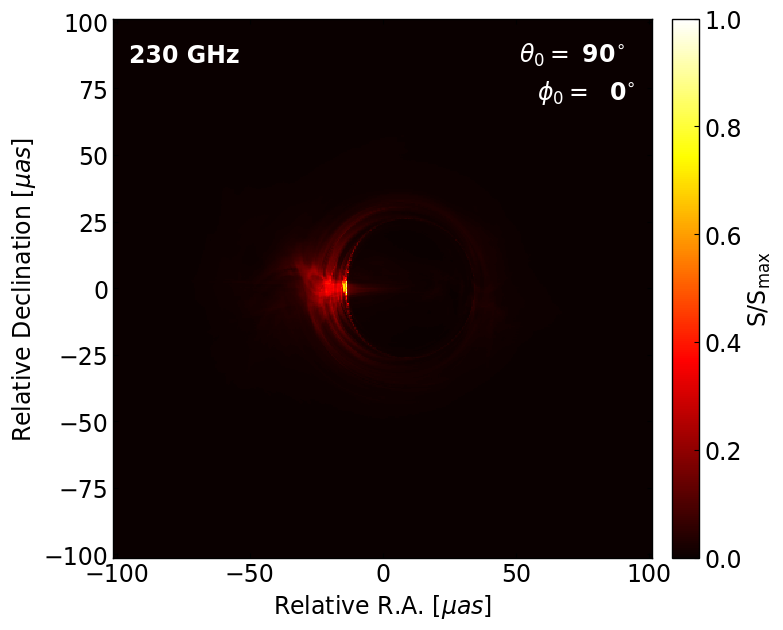

In [16]:
from pyhamrds import bhoss
import matplotlib.pyplot as plt
import os
%matplotlib inline

#datadir = "/lustre04/scratch/astrodoo/BHOSS_EHT/bhoss_MA05/Rh1/inc10/BHOSS_CODE"
#data = "Rh1_Rl1_sig1_i10_ph0_SgrA_Th_IMAGE_GRMHD_HAMR3D_EHT_MADS41A5_331.dat"

filename  = os.path.join(datadir, data)

figdir = os.environ['PYTHONFIG']
#bhoss.show_image(filename,ifreq=10,cmap='hot',out=os.path.join(figdir,'bhoss_img_David512_201.png'))
bhoss.show_image(filename,ifreq=0,cmap='hot') # Koushik's data - only 230GHz

# Check Average Flux

In [1]:
import os
import numpy as np

#find average flux
def bhoss_avg(Rhigh,inclination,model_name,ifreq=2):

    note=""
    if (model_name == "MADS41A5"):
        model_str = "bhoss_MA05"
        ind_start = 311
        ind_end = 410
    elif (model_name == "MADS41A0"):
        model_str = "bhoss_MA0"
        ind_start = 97
        ind_end = 196
    elif (model_name == "MADS41A93"):
        model_str = "bhoss_MA93"
        ind_start = 96
        ind_end = 195
    elif (model_name == "SANEA93M"):
        model_str = "bhoss_SA93M"
        ind_start=132
        ind_end = 231
    elif (model_name == "SANEA93"):
        model_str = "bhoss_SA93"
        ind_start=99
        ind_end = 198
    elif (model_name == "SANEA05"):
        model_str = "bhoss_SA05"
        ind_start=900
        ind_end = 999
        note="192_"
    else:
        print("no model")
        return
    
    if ((Rhigh==1) | (Rhigh==5) | (Rhigh==10) | (Rhigh==40) | (Rhigh==160)):
        Rh_str = "Rh%d"%Rhigh
    else:
        print("no model")
        return
    
    if ((inclination==10) | (inclination==30) | (inclination==50) | (inclination==70) | (inclination==90)):
        inc_str = "inc%d"%inclination
    else:
        print("no model")
        return
    
    basedir = "/lustre04/scratch/astrodoo/BHOSS_EHT"
    workdir = os.path.join(basedir,model_str,Rh_str,inc_str,'BHOSS_CODE')
    print("work directory %s"%workdir)
    os.chdir(workdir)
    
    z_tot=np.zeros((ind_end-ind_start+1))
    time =np.zeros((ind_end-ind_start+1))
    ind  =np.zeros((ind_end-ind_start+1))
    
    file_path = os.getcwd()
    print("ifreq=%d: Should be checked if it is the correct freqency."%ifreq)
    for image_ind in range(ind_start,ind_end+1):
        data_name="Rhigh_%d_incl_%d_IMAGE_GRMHD_HAMR3D_%s_%s%d.dat" \
        %(Rhigh,inclination,model_name,note,image_ind)
        filename  = os.path.join(file_path, data_name)
        
        header_1 = np.genfromtxt(filename, max_rows = 1)
        header_2 = np.genfromtxt(filename, skip_header = 1, max_rows = 1)
        header_3 = np.genfromtxt(filename, skip_header = 2, max_rows = 1)
        M           = int(header_1[2])
        Jansky_corr          = header_2[5]
        #ascii2 = np.loadtxt(filename, skiprows = 3, usecols = (0, 1, 2))
        ascii2 = np.loadtxt(filename, skiprows = 3, usecols = (0, 1, ifreq+2))
        data2=ascii2.reshape([M, M, 3])
        z    = data2[:,:,2]*Jansky_corr #convert to Jansky
        z_tot[image_ind-ind_start]=np.sum(z)
        
        ind[image_ind-ind_start] = image_ind
        time[image_ind-ind_start] = header_2[0]   # time
        
        print("%d, flux: %f at %f"%(image_ind,z_tot[image_ind-ind_start],time[image_ind-ind_start]))
        
    dscale = header_2[7]
    print(model_name+"Rh%d"%Rhigh,"Average total flux =", np.sum(z_tot)/(ind_end-ind_start+1), \
          "Jy; density_scale=", dscale)
    return (ind,time,z_tot,dscale) 

# Rhigh=1

In [2]:
ind,time,z_tot,dscale = bhoss_avg(1, 10, "SANEA05",ifreq=2)

work directory /lustre04/scratch/astrodoo/BHOSS_EHT/bhoss_SA05/Rh1/inc10/BHOSS_CODE
ifreq=2: Should be checked if it is the correct freqency.
900, flux: 2.088179 at 9004.175748
901, flux: 2.093429 at 9014.467259
902, flux: 2.101379 at 9024.753706
903, flux: 2.092174 at 9035.042339
904, flux: 2.106601 at 9040.190678
905, flux: 2.170695 at 9050.479649
906, flux: 2.232649 at 9060.777796
907, flux: 2.264629 at 9071.068808
908, flux: 2.290261 at 9081.361434
909, flux: 2.322491 at 9091.653085
910, flux: 2.317690 at 9101.943931
911, flux: 2.293117 at 9112.236989
912, flux: 2.286772 at 9122.537982
913, flux: 2.289776 at 9132.835339
914, flux: 2.277527 at 9143.127573
915, flux: 2.267028 at 9153.426788
916, flux: 2.263364 at 9163.713532
917, flux: 2.226182 at 9174.015871
918, flux: 2.209667 at 9184.310153
919, flux: 2.214200 at 9194.611719
920, flux: 2.205294 at 9204.910398
921, flux: 2.202146 at 9210.053489
922, flux: 2.215101 at 9220.340913
923, flux: 2.225018 at 9230.627288
924, flux: 2.21159

In [3]:
import numpy as np
import os
from shutil import copy2

# save the data for the faster read in next use.
outdir = "/lustre04/scratch/astrodoo/BHOSS_EHT/bhoss_SA05/Rh1/inc10/BHOSS_CODE"
fname = 'flux230.npz'
np.savez(os.path.join(outdir,fname), time=time, ind=ind, z_tot=z_tot, dscale=dscale \
        ,info=[{'data':outdir,'code':'EHT_BHOSS' \
                ,'unit':{'time':'t_g','ind':'index','z_tot':'Jy','dscale':'unitless'}}])

In [4]:
import numpy as np
import os

outdir = "/lustre04/scratch/astrodoo/BHOSS_EHT/bhoss_SA05/Rh1/inc10/BHOSS_CODE"
fname = 'flux230.npz'

data = np.load(os.path.join(outdir,fname))
time,z_tot,dscale,ind = data["time"], data["z_tot"], data["dscale"], data["ind"]


min/max/N index = 900/999/100
average z_tot = 2.123449 Jy, the density scale = 6.000000e-17


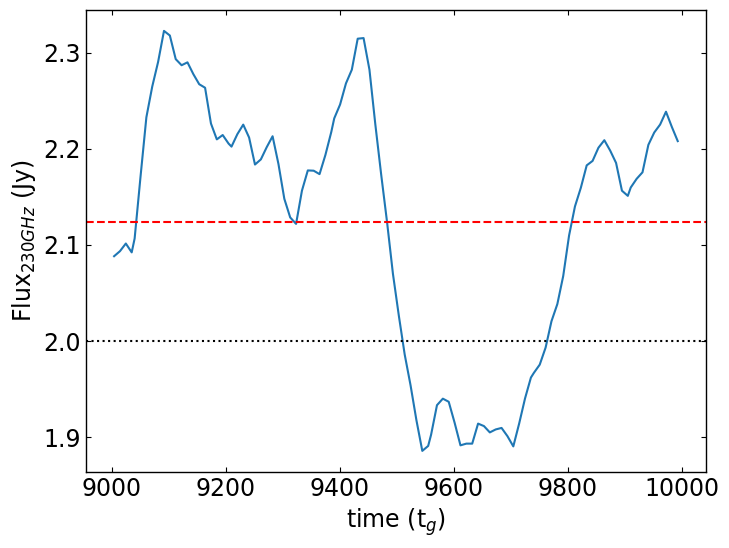

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline


z_ave = np.sum(z_tot)/float(len(z_tot))

fig,ax = plt.subplots()

ax.plot(time, z_tot)
ax.axhline(y=2, linestyle=":",color="k")
ax.axhline(y=z_ave, linestyle='--',color='red')

ax.set_xlabel(r'time (t$_g$)')
ax.set_ylabel(r'Flux$_{230 GHz}$ (Jy)')

print("min/max/N index = %d/%d/%d"%(ind[0],ind[-1],len(ind)))
print("average z_tot = %f Jy, the density scale = %e"%(z_ave,dscale))

In [6]:
for i,iind in enumerate(ind):
    print("%d:: %f Jy at %f"%(iind,z_tot[i],time[i]))

900:: 2.088179 Jy at 9004.175748
901:: 2.093429 Jy at 9014.467259
902:: 2.101379 Jy at 9024.753706
903:: 2.092174 Jy at 9035.042339
904:: 2.106601 Jy at 9040.190678
905:: 2.170695 Jy at 9050.479649
906:: 2.232649 Jy at 9060.777796
907:: 2.264629 Jy at 9071.068808
908:: 2.290261 Jy at 9081.361434
909:: 2.322491 Jy at 9091.653085
910:: 2.317690 Jy at 9101.943931
911:: 2.293117 Jy at 9112.236989
912:: 2.286772 Jy at 9122.537982
913:: 2.289776 Jy at 9132.835339
914:: 2.277527 Jy at 9143.127573
915:: 2.267028 Jy at 9153.426788
916:: 2.263364 Jy at 9163.713532
917:: 2.226182 Jy at 9174.015871
918:: 2.209667 Jy at 9184.310153
919:: 2.214200 Jy at 9194.611719
920:: 2.205294 Jy at 9204.910398
921:: 2.202146 Jy at 9210.053489
922:: 2.215101 Jy at 9220.340913
923:: 2.225018 Jy at 9230.627288
924:: 2.211592 Jy at 9240.912106
925:: 2.183513 Jy at 9251.207150
926:: 2.188829 Jy at 9261.504341
927:: 2.201573 Jy at 9271.801193
928:: 2.212929 Jy at 9282.101724
929:: 2.184026 Jy at 9292.393767
930:: 2.14

In [7]:
ind,time,z_tot,dscale = bhoss_avg(1, 50, "SANEA05", ifreq=2)

work directory /lustre04/scratch/astrodoo/BHOSS_EHT/bhoss_SA05/Rh1/inc50/BHOSS_CODE
ifreq=2: Should be checked if it is the correct freqency.
900, flux: 2.029711 at 9004.175748
901, flux: 2.012471 at 9014.467259
902, flux: 2.009436 at 9024.753706
903, flux: 2.011955 at 9035.042339
904, flux: 2.034543 at 9040.190678
905, flux: 2.104219 at 9050.479649
906, flux: 2.161914 at 9060.777796
907, flux: 2.194925 at 9071.068808
908, flux: 2.226440 at 9081.361434
909, flux: 2.272556 at 9091.653085
910, flux: 2.266585 at 9101.943931
911, flux: 2.250245 at 9112.236989
912, flux: 2.254665 at 9122.537982
913, flux: 2.254280 at 9132.835339
914, flux: 2.227304 at 9143.127573
915, flux: 2.190027 at 9153.426788
916, flux: 2.137047 at 9163.713532
917, flux: 2.062172 at 9174.015871
918, flux: 2.028012 at 9184.310153
919, flux: 2.010112 at 9194.611719
920, flux: 1.992942 at 9204.910398
921, flux: 1.983541 at 9210.053489
922, flux: 1.989603 at 9220.340913
923, flux: 2.023868 at 9230.627288
924, flux: 2.03941

In [8]:
import numpy as np
import os
from shutil import copy2

# save the data for the faster read in next use.
outdir = "/lustre04/scratch/astrodoo/BHOSS_EHT/bhoss_SA05/Rh1/inc50/BHOSS_CODE"
fname = 'flux230.npz'
np.savez(os.path.join(outdir,fname), time=time, ind=ind, z_tot=z_tot, dscale=dscale \
        ,info=[{'data':outdir,'code':'EHT_BHOSS' \
                ,'unit':{'time':'t_g','ind':'index','z_tot':'Jy','dscale':'unitless'}}])

In [9]:
import numpy as np
import os

outdir = "/lustre04/scratch/astrodoo/BHOSS_EHT/bhoss_SA05/Rh1/inc50/BHOSS_CODE"
fname = 'flux230.npz'

data = np.load(os.path.join(outdir,fname))
time,z_tot,dscale,ind = data["time"], data["z_tot"], data["dscale"], data["ind"]


min/max/N index = 900/999/100
average z_tot = 2.045736 Jy, the density scale = 5.700000e-17


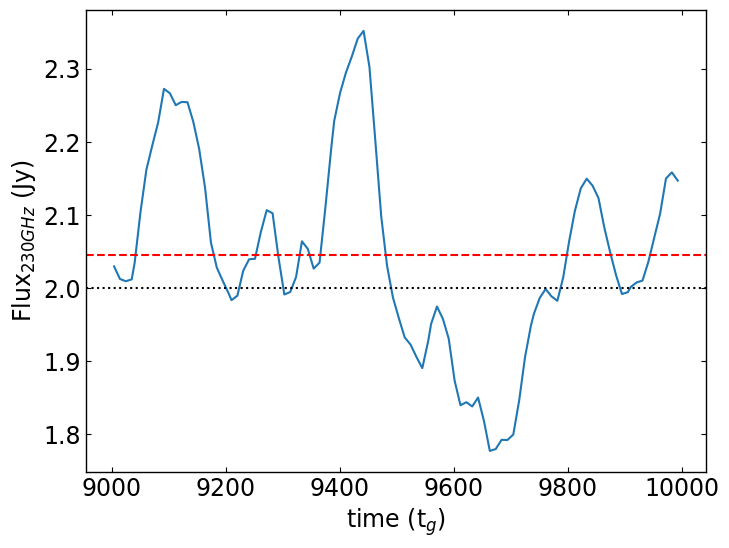

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline


z_ave = np.sum(z_tot)/float(len(z_tot))

fig,ax = plt.subplots()

ax.plot(time, z_tot)
ax.axhline(y=2, linestyle=":",color="k")
ax.axhline(y=z_ave, linestyle='--',color='red')

ax.set_xlabel(r'time (t$_g$)')
ax.set_ylabel(r'Flux$_{230 GHz}$ (Jy)')

print("min/max/N index = %d/%d/%d"%(ind[0],ind[-1],len(ind)))
print("average z_tot = %f Jy, the density scale = %e"%(z_ave,dscale))

In [11]:
ind,time,z_tot,dscale = bhoss_avg(1, 90, "SANEA05", ifreq=2)

work directory /lustre04/scratch/astrodoo/BHOSS_EHT/bhoss_SA05/Rh1/inc90/BHOSS_CODE
ifreq=2: Should be checked if it is the correct freqency.
900, flux: 1.984237 at 9004.175748
901, flux: 1.936828 at 9014.467259
902, flux: 1.967718 at 9024.753706
903, flux: 1.991193 at 9035.042339
904, flux: 1.991486 at 9040.190678
905, flux: 1.992582 at 9050.479649
906, flux: 2.034000 at 9060.777796
907, flux: 2.023336 at 9071.068808
908, flux: 2.016633 at 9081.361434
909, flux: 2.055729 at 9091.653085
910, flux: 2.091261 at 9101.943931
911, flux: 2.040225 at 9112.236989
912, flux: 2.033128 at 9122.537982
913, flux: 2.064503 at 9132.835339
914, flux: 1.963777 at 9143.127573
915, flux: 1.910755 at 9153.426788
916, flux: 1.931716 at 9163.713532
917, flux: 1.939323 at 9174.015871
918, flux: 1.828799 at 9184.310153
919, flux: 1.829808 at 9194.611719
920, flux: 1.769351 at 9204.910398
921, flux: 1.787637 at 9210.053489
922, flux: 1.832250 at 9220.340913
923, flux: 1.928289 at 9230.627288
924, flux: 2.02316

In [12]:
import numpy as np
import os
from shutil import copy2

# save the data for the faster read in next use.
outdir = "/lustre04/scratch/astrodoo/BHOSS_EHT/bhoss_SA05/Rh1/inc90/BHOSS_CODE"
fname = 'flux230.npz'
np.savez(os.path.join(outdir,fname), time=time, ind=ind, z_tot=z_tot, dscale=dscale \
        ,info=[{'data':outdir,'code':'EHT_BHOSS' \
                ,'unit':{'time':'t_g','ind':'index','z_tot':'Jy','dscale':'unitless'}}])

In [13]:
import numpy as np
import os

outdir = "/lustre04/scratch/astrodoo/BHOSS_EHT/bhoss_SA05/Rh1/inc90/BHOSS_CODE"
fname = 'flux230.npz'

data = np.load(os.path.join(outdir,fname))
time,z_tot,dscale,ind = data["time"], data["z_tot"], data["dscale"], data["ind"]


min/max/N index = 900/999/100
average z_tot = 1.946572 Jy, the density scale = 5.500000e-17


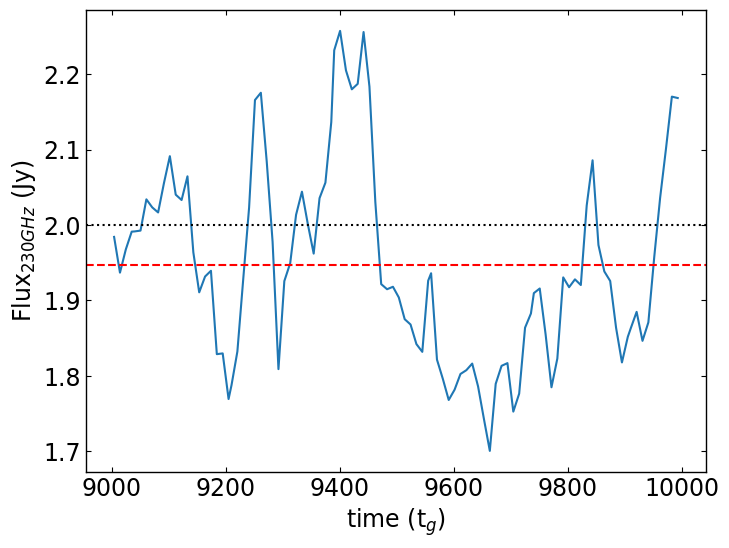

In [14]:
import matplotlib.pyplot as plt
%matplotlib inline


z_ave = np.sum(z_tot)/float(len(z_tot))

fig,ax = plt.subplots()

ax.plot(time, z_tot)
ax.axhline(y=2, linestyle=":",color="k")
ax.axhline(y=z_ave, linestyle='--',color='red')

ax.set_xlabel(r'time (t$_g$)')
ax.set_ylabel(r'Flux$_{230 GHz}$ (Jy)')

print("min/max/N index = %d/%d/%d"%(ind[0],ind[-1],len(ind)))
print("average z_tot = %f Jy, the density scale = %e"%(z_ave,dscale))

# Rhigh = 40

In [15]:
ind,time,z_tot,dscale = bhoss_avg(40, 10, "SANEA05", ifreq=2)

work directory /lustre04/scratch/astrodoo/BHOSS_EHT/bhoss_SA05/Rh40/inc10/BHOSS_CODE
ifreq=2: Should be checked if it is the correct freqency.
900, flux: 2.110547 at 9004.175748
901, flux: 2.002958 at 9014.467259
902, flux: 1.883318 at 9024.753706
903, flux: 1.906181 at 9035.042339
904, flux: 1.868388 at 9040.190678
905, flux: 1.899274 at 9050.479649
906, flux: 1.864255 at 9060.777796
907, flux: 1.930369 at 9071.068808
908, flux: 1.948451 at 9081.361434
909, flux: 2.050814 at 9091.653085
910, flux: 2.143692 at 9101.943931
911, flux: 2.292805 at 9112.236989
912, flux: 2.291420 at 9122.537982
913, flux: 2.146868 at 9132.835339
914, flux: 2.060321 at 9143.127573
915, flux: 2.049750 at 9153.426788
916, flux: 2.022234 at 9163.713532
917, flux: 2.160562 at 9174.015871
918, flux: 2.228406 at 9184.310153
919, flux: 2.243452 at 9194.611719
920, flux: 2.250753 at 9204.910398
921, flux: 2.241712 at 9210.053489
922, flux: 2.222861 at 9220.340913
923, flux: 2.113686 at 9230.627288
924, flux: 2.0964

In [16]:
import numpy as np
import os
from shutil import copy2

# save the data for the faster read in next use.
outdir = "/lustre04/scratch/astrodoo/BHOSS_EHT/bhoss_SA05/Rh40/inc10/BHOSS_CODE"
fname = 'flux230.npz'
np.savez(os.path.join(outdir,fname), time=time, ind=ind, z_tot=z_tot, dscale=dscale \
        ,info=[{'data':outdir,'code':'EHT_BHOSS' \
                ,'unit':{'time':'t_g','ind':'index','z_tot':'Jy','dscale':'unitless'}}])

In [17]:
import numpy as np
import os

outdir = "/lustre04/scratch/astrodoo/BHOSS_EHT/bhoss_SA05/Rh40/inc10/BHOSS_CODE"
fname = 'flux230.npz'

data = np.load(os.path.join(outdir,fname))
time,z_tot,dscale,ind = data["time"], data["z_tot"], data["dscale"], data["ind"]


min/max/N index = 900/999/100
average z_tot = 1.994478 Jy, the density scale = 1.330000e-14


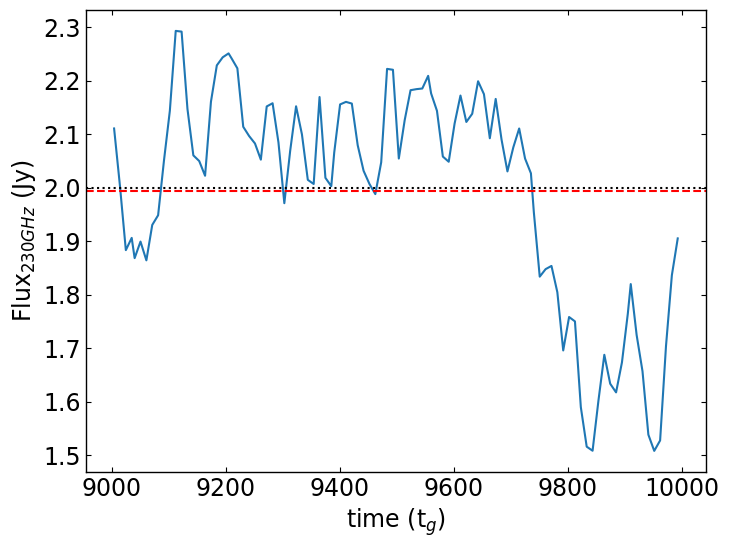

In [18]:
import matplotlib.pyplot as plt
%matplotlib inline


z_ave = np.sum(z_tot)/float(len(z_tot))

fig,ax = plt.subplots()

ax.plot(time, z_tot)
ax.axhline(y=2, linestyle=":",color="k")
ax.axhline(y=z_ave, linestyle='--',color='red')

ax.set_xlabel(r'time (t$_g$)')
ax.set_ylabel(r'Flux$_{230 GHz}$ (Jy)')

print("min/max/N index = %d/%d/%d"%(ind[0],ind[-1],len(ind)))
print("average z_tot = %f Jy, the density scale = %e"%(z_ave,dscale))

In [19]:
ind,time,z_tot,dscale = bhoss_avg(40, 50, "SANEA05", ifreq=2)

work directory /lustre04/scratch/astrodoo/BHOSS_EHT/bhoss_SA05/Rh40/inc50/BHOSS_CODE
ifreq=2: Should be checked if it is the correct freqency.
900, flux: 1.934644 at 9004.175748
901, flux: 1.922999 at 9014.467259
902, flux: 1.838510 at 9024.753706
903, flux: 1.786779 at 9035.042339
904, flux: 1.851318 at 9040.190678
905, flux: 2.015110 at 9050.479649
906, flux: 1.964790 at 9060.777796
907, flux: 1.968906 at 9071.068808
908, flux: 1.985776 at 9081.361434
909, flux: 1.936865 at 9091.653085
910, flux: 2.025013 at 9101.943931
911, flux: 2.240102 at 9112.236989
912, flux: 2.328571 at 9122.537982
913, flux: 2.129431 at 9132.835339
914, flux: 2.076702 at 9143.127573
915, flux: 2.092031 at 9153.426788
916, flux: 2.145330 at 9163.713532
917, flux: 2.194665 at 9174.015871
918, flux: 2.187595 at 9184.310153
919, flux: 2.209711 at 9194.611719
920, flux: 2.295687 at 9204.910398
921, flux: 2.351543 at 9210.053489
922, flux: 2.459336 at 9220.340913
923, flux: 2.292925 at 9230.627288
924, flux: 2.3781

In [20]:
import numpy as np
import os
from shutil import copy2

# save the data for the faster read in next use.
outdir = "/lustre04/scratch/astrodoo/BHOSS_EHT/bhoss_SA05/Rh40/inc50/BHOSS_CODE"
fname = 'flux230.npz'
np.savez(os.path.join(outdir,fname), time=time, ind=ind, z_tot=z_tot, dscale=dscale \
        ,info=[{'data':outdir,'code':'EHT_BHOSS' \
                ,'unit':{'time':'t_g','ind':'index','z_tot':'Jy','dscale':'unitless'}}])

In [21]:
import numpy as np
import os

outdir = "/lustre04/scratch/astrodoo/BHOSS_EHT/bhoss_SA05/Rh40/inc50/BHOSS_CODE"
fname = 'flux230.npz'

data = np.load(os.path.join(outdir,fname))
time,z_tot,dscale,ind = data["time"], data["z_tot"], data["dscale"], data["ind"]


min/max/N index = 900/999/100
average z_tot = 2.017429 Jy, the density scale = 1.470000e-14


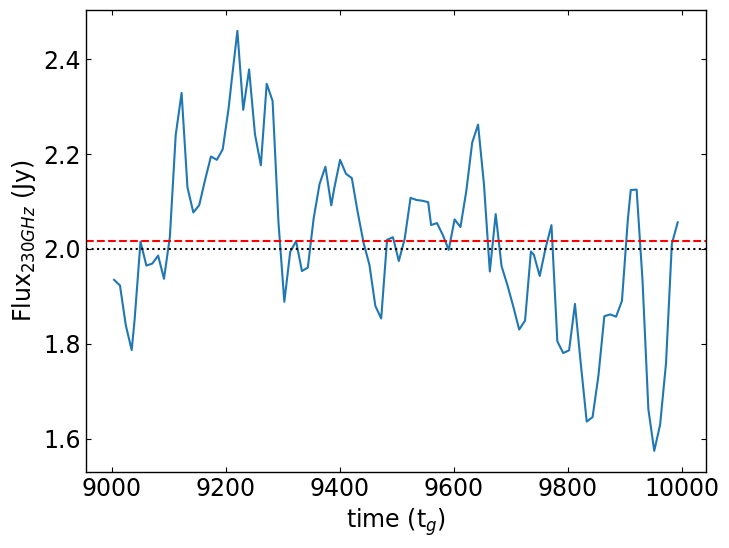

In [22]:
import matplotlib.pyplot as plt
%matplotlib inline


z_ave = np.sum(z_tot)/float(len(z_tot))

fig,ax = plt.subplots()

ax.plot(time, z_tot)
ax.axhline(y=2, linestyle=":",color="k")
ax.axhline(y=z_ave, linestyle='--',color='red')

ax.set_xlabel(r'time (t$_g$)')
ax.set_ylabel(r'Flux$_{230 GHz}$ (Jy)')

print("min/max/N index = %d/%d/%d"%(ind[0],ind[-1],len(ind)))
print("average z_tot = %f Jy, the density scale = %e"%(z_ave,dscale))

In [23]:
ind,time,z_tot,dscale = bhoss_avg(40, 90, "SANEA05", ifreq=2)

work directory /lustre04/scratch/astrodoo/BHOSS_EHT/bhoss_SA05/Rh40/inc90/BHOSS_CODE
ifreq=2: Should be checked if it is the correct freqency.
900, flux: 2.051952 at 9004.175748
901, flux: 2.029298 at 9014.467259
902, flux: 2.057295 at 9024.753706
903, flux: 1.980618 at 9035.042339
904, flux: 2.025475 at 9040.190678
905, flux: 2.232758 at 9050.479649
906, flux: 2.180749 at 9060.777796
907, flux: 2.196439 at 9071.068808
908, flux: 2.159369 at 9081.361434
909, flux: 2.114487 at 9091.653085
910, flux: 2.160599 at 9101.943931
911, flux: 2.293833 at 9112.236989
912, flux: 2.454439 at 9122.537982
913, flux: 2.288754 at 9132.835339
914, flux: 2.121272 at 9143.127573
915, flux: 2.112793 at 9153.426788
916, flux: 2.236855 at 9163.713532
917, flux: 2.276902 at 9174.015871
918, flux: 2.266224 at 9184.310153
919, flux: 2.262495 at 9194.611719
920, flux: 2.290974 at 9204.910398
921, flux: 2.356773 at 9210.053489
922, flux: 2.467839 at 9220.340913
923, flux: 2.402712 at 9230.627288
924, flux: 2.4637

In [24]:
import numpy as np
import os
from shutil import copy2

# save the data for the faster read in next use.
outdir = "/lustre04/scratch/astrodoo/BHOSS_EHT/bhoss_SA05/Rh40/inc90/BHOSS_CODE"
fname = 'flux230.npz'
np.savez(os.path.join(outdir,fname), time=time, ind=ind, z_tot=z_tot, dscale=dscale \
        ,info=[{'data':outdir,'code':'EHT_BHOSS' \
                ,'unit':{'time':'t_g','ind':'index','z_tot':'Jy','dscale':'unitless'}}])

In [25]:
import numpy as np
import os

outdir = "/lustre04/scratch/astrodoo/BHOSS_EHT/bhoss_SA05/Rh40/inc90/BHOSS_CODE"
fname = 'flux230.npz'

data = np.load(os.path.join(outdir,fname))
time,z_tot,dscale,ind = data["time"], data["z_tot"], data["dscale"], data["ind"]


min/max/N index = 900/999/100
average z_tot = 2.030077 Jy, the density scale = 1.500000e-14


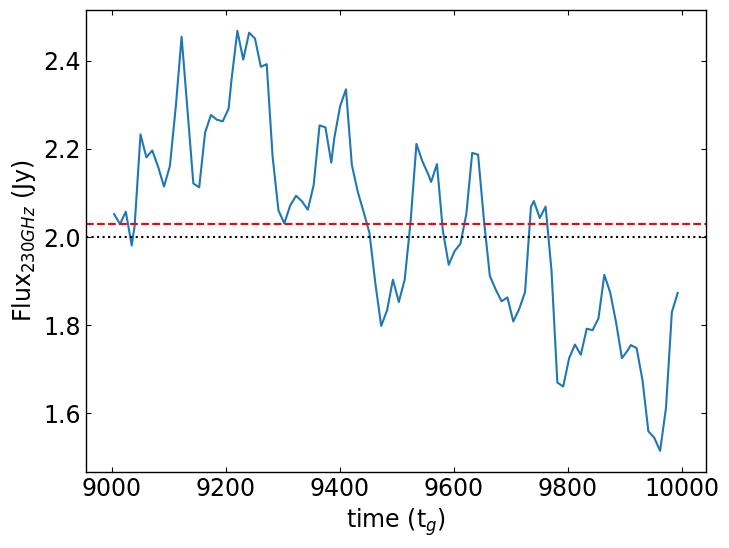

In [26]:
import matplotlib.pyplot as plt
%matplotlib inline


z_ave = np.sum(z_tot)/float(len(z_tot))

fig,ax = plt.subplots()

ax.plot(time, z_tot)
ax.axhline(y=2, linestyle=":",color="k")
ax.axhline(y=z_ave, linestyle='--',color='red')

ax.set_xlabel(r'time (t$_g$)')
ax.set_ylabel(r'Flux$_{230 GHz}$ (Jy)')

print("min/max/N index = %d/%d/%d"%(ind[0],ind[-1],len(ind)))
print("average z_tot = %f Jy, the density scale = %e"%(z_ave,dscale))

# Rhigh = 160

In [27]:
ind,time,z_tot,dscale = bhoss_avg(160, 10, "SANEA05", ifreq=2)

work directory /lustre04/scratch/astrodoo/BHOSS_EHT/bhoss_SA05/Rh160/inc10/BHOSS_CODE
ifreq=2: Should be checked if it is the correct freqency.
900, flux: 2.097853 at 9004.175748
901, flux: 1.999239 at 9014.467259
902, flux: 1.856271 at 9024.753706
903, flux: 1.757903 at 9035.042339
904, flux: 1.714352 at 9040.190678
905, flux: 1.730214 at 9050.479649
906, flux: 1.662413 at 9060.777796
907, flux: 1.738850 at 9071.068808
908, flux: 1.838851 at 9081.361434
909, flux: 1.930151 at 9091.653085
910, flux: 1.947254 at 9101.943931
911, flux: 2.130802 at 9112.236989
912, flux: 2.138220 at 9122.537982
913, flux: 1.987648 at 9132.835339
914, flux: 2.083179 at 9143.127573
915, flux: 2.050681 at 9153.426788
916, flux: 2.027539 at 9163.713532
917, flux: 2.221872 at 9174.015871
918, flux: 2.205979 at 9184.310153
919, flux: 2.237536 at 9194.611719
920, flux: 2.179548 at 9204.910398
921, flux: 2.182319 at 9210.053489
922, flux: 2.235384 at 9220.340913
923, flux: 2.188892 at 9230.627288
924, flux: 2.124

In [28]:
import numpy as np
import os
from shutil import copy2

# save the data for the faster read in next use.
outdir = "/lustre04/scratch/astrodoo/BHOSS_EHT/bhoss_SA05/Rh160/inc10/BHOSS_CODE"
fname = 'flux230.npz'
np.savez(os.path.join(outdir,fname), time=time, ind=ind, z_tot=z_tot, dscale=dscale \
        ,info=[{'data':outdir,'code':'EHT_BHOSS' \
                ,'unit':{'time':'t_g','ind':'index','z_tot':'Jy','dscale':'unitless'}}])

In [29]:
import numpy as np
import os

outdir = "/lustre04/scratch/astrodoo/BHOSS_EHT/bhoss_SA05/Rh160/inc10/BHOSS_CODE"
fname = 'flux230.npz'

data = np.load(os.path.join(outdir,fname))
time,z_tot,dscale,ind = data["time"], data["z_tot"], data["dscale"], data["ind"]


min/max/N index = 900/999/100
average z_tot = 1.972580 Jy, the density scale = 3.000000e-14


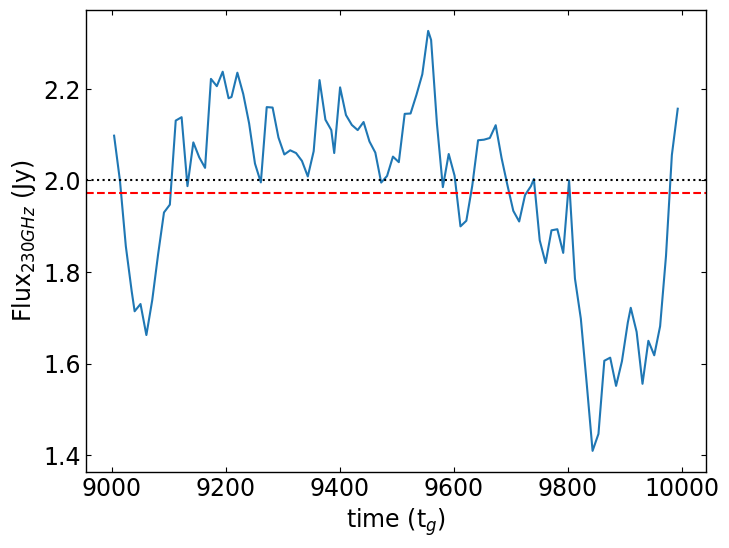

In [30]:
import matplotlib.pyplot as plt
%matplotlib inline


z_ave = np.sum(z_tot)/float(len(z_tot))

fig,ax = plt.subplots()

ax.plot(time, z_tot)
ax.axhline(y=2, linestyle=":",color="k")
ax.axhline(y=z_ave, linestyle='--',color='red')

ax.set_xlabel(r'time (t$_g$)')
ax.set_ylabel(r'Flux$_{230 GHz}$ (Jy)')

print("min/max/N index = %d/%d/%d"%(ind[0],ind[-1],len(ind)))
print("average z_tot = %f Jy, the density scale = %e"%(z_ave,dscale))

In [31]:
ind,time,z_tot,dscale = bhoss_avg(160, 50, "SANEA05", ifreq=2)

work directory /lustre04/scratch/astrodoo/BHOSS_EHT/bhoss_SA05/Rh160/inc50/BHOSS_CODE
ifreq=2: Should be checked if it is the correct freqency.
900, flux: 2.117426 at 9004.175748
901, flux: 2.065645 at 9014.467259
902, flux: 1.913424 at 9024.753706
903, flux: 1.775570 at 9035.042339
904, flux: 1.800321 at 9040.190678
905, flux: 1.875154 at 9050.479649
906, flux: 1.790197 at 9060.777796
907, flux: 1.814054 at 9071.068808
908, flux: 1.832427 at 9081.361434
909, flux: 1.952636 at 9091.653085
910, flux: 1.935314 at 9101.943931
911, flux: 2.133833 at 9112.236989
912, flux: 2.227115 at 9122.537982
913, flux: 2.048642 at 9132.835339
914, flux: 2.086790 at 9143.127573
915, flux: 2.108000 at 9153.426788
916, flux: 2.040511 at 9163.713532
917, flux: 2.315966 at 9174.015871
918, flux: 2.211572 at 9184.310153
919, flux: 2.243019 at 9194.611719
920, flux: 2.233002 at 9204.910398
921, flux: 2.235047 at 9210.053489
922, flux: 2.396883 at 9220.340913
923, flux: 2.316171 at 9230.627288
924, flux: 2.377

In [32]:
import numpy as np
import os
from shutil import copy2

# save the data for the faster read in next use.
outdir = "/lustre04/scratch/astrodoo/BHOSS_EHT/bhoss_SA05/Rh160/inc50/BHOSS_CODE"
fname = 'flux230.npz'
np.savez(os.path.join(outdir,fname), time=time, ind=ind, z_tot=z_tot, dscale=dscale \
        ,info=[{'data':outdir,'code':'EHT_BHOSS' \
                ,'unit':{'time':'t_g','ind':'index','z_tot':'Jy','dscale':'unitless'}}])

In [33]:
import numpy as np
import os

outdir = "/lustre04/scratch/astrodoo/BHOSS_EHT/bhoss_SA05/Rh160/inc50/BHOSS_CODE"
fname = 'flux230.npz'

data = np.load(os.path.join(outdir,fname))
time,z_tot,dscale,ind = data["time"], data["z_tot"], data["dscale"], data["ind"]


min/max/N index = 900/999/100
average z_tot = 2.049369 Jy, the density scale = 3.200000e-14


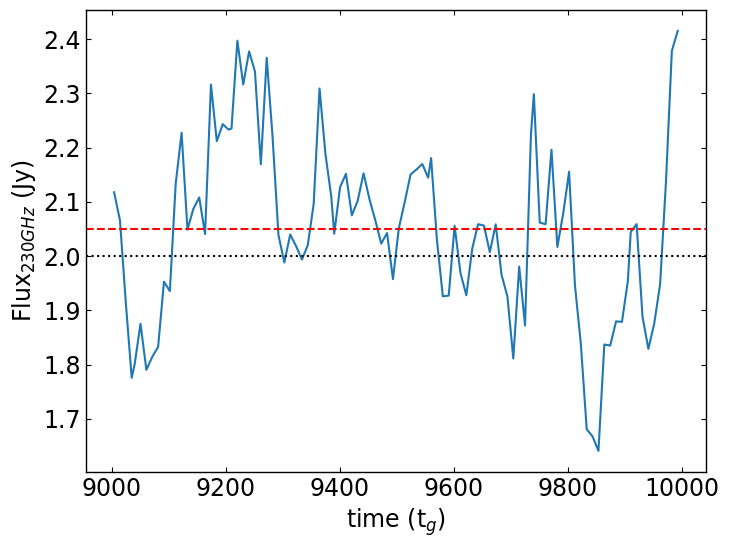

In [34]:
import matplotlib.pyplot as plt
%matplotlib inline


z_ave = np.sum(z_tot)/float(len(z_tot))

fig,ax = plt.subplots()

ax.plot(time, z_tot)
ax.axhline(y=2, linestyle=":",color="k")
ax.axhline(y=z_ave, linestyle='--',color='red')

ax.set_xlabel(r'time (t$_g$)')
ax.set_ylabel(r'Flux$_{230 GHz}$ (Jy)')

print("min/max/N index = %d/%d/%d"%(ind[0],ind[-1],len(ind)))
print("average z_tot = %f Jy, the density scale = %e"%(z_ave,dscale))

In [35]:
ind,time,z_tot,dscale = bhoss_avg(160, 90, "SANEA05", ifreq=2)

work directory /lustre04/scratch/astrodoo/BHOSS_EHT/bhoss_SA05/Rh160/inc90/BHOSS_CODE
ifreq=2: Should be checked if it is the correct freqency.
900, flux: 2.192672 at 9004.175748
901, flux: 2.079618 at 9014.467259
902, flux: 2.064101 at 9024.753706
903, flux: 1.988859 at 9035.042339
904, flux: 1.959249 at 9040.190678
905, flux: 2.094910 at 9050.479649
906, flux: 2.088438 at 9060.777796
907, flux: 2.002909 at 9071.068808
908, flux: 1.901962 at 9081.361434
909, flux: 1.972428 at 9091.653085
910, flux: 1.882140 at 9101.943931
911, flux: 1.934981 at 9112.236989
912, flux: 2.223936 at 9122.537982
913, flux: 1.994873 at 9132.835339
914, flux: 2.065320 at 9143.127573
915, flux: 2.138424 at 9153.426788
916, flux: 2.033234 at 9163.713532
917, flux: 2.255625 at 9174.015871
918, flux: 2.189547 at 9184.310153
919, flux: 2.129790 at 9194.611719
920, flux: 2.133946 at 9204.910398
921, flux: 2.168103 at 9210.053489
922, flux: 2.345979 at 9220.340913
923, flux: 2.293211 at 9230.627288
924, flux: 2.364

In [36]:
import numpy as np
import os
from shutil import copy2

# save the data for the faster read in next use.
outdir = "/lustre04/scratch/astrodoo/BHOSS_EHT/bhoss_SA05/Rh160/inc90/BHOSS_CODE"
fname = 'flux230.npz'
np.savez(os.path.join(outdir,fname), time=time, ind=ind, z_tot=z_tot, dscale=dscale \
        ,info=[{'data':outdir,'code':'EHT_BHOSS' \
                ,'unit':{'time':'t_g','ind':'index','z_tot':'Jy','dscale':'unitless'}}])

In [37]:
import numpy as np
import os

outdir = "/lustre04/scratch/astrodoo/BHOSS_EHT/bhoss_SA05/Rh160/inc90/BHOSS_CODE"
fname = 'flux230.npz'

data = np.load(os.path.join(outdir,fname))
time,z_tot,dscale,ind = data["time"], data["z_tot"], data["dscale"], data["ind"]


min/max/N index = 900/999/100
average z_tot = 1.925985 Jy, the density scale = 3.200000e-14


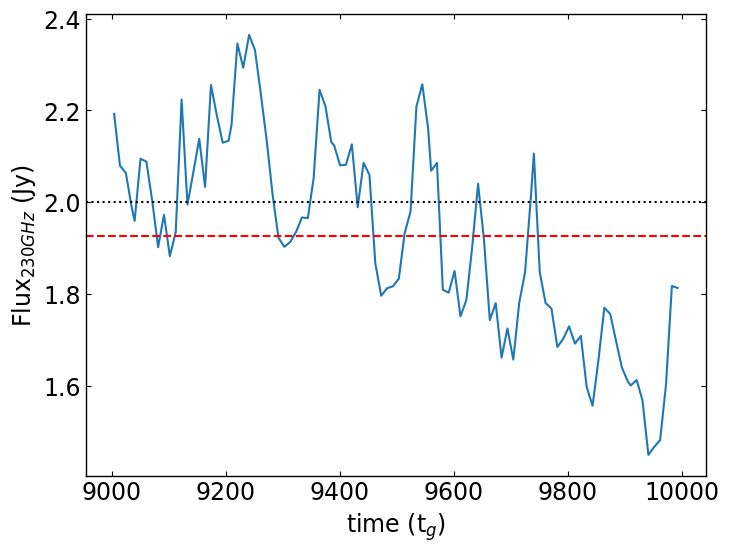

In [38]:
import matplotlib.pyplot as plt
%matplotlib inline


z_ave = np.sum(z_tot)/float(len(z_tot))

fig,ax = plt.subplots()

ax.plot(time, z_tot)
ax.axhline(y=2, linestyle=":",color="k")
ax.axhline(y=z_ave, linestyle='--',color='red')

ax.set_xlabel(r'time (t$_g$)')
ax.set_ylabel(r'Flux$_{230 GHz}$ (Jy)')

print("min/max/N index = %d/%d/%d"%(ind[0],ind[-1],len(ind)))
print("average z_tot = %f Jy, the density scale = %e"%(z_ave,dscale))